# Sandbox - Utils

In [13]:
import os
import matplotlib.pyplot as plt
from multichannel_calibration.image_processing import read_image, show_image, reflect_image, rotate_image, crop_square_roi

In [14]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['text.usetex'] = True

Bits per channel: 16


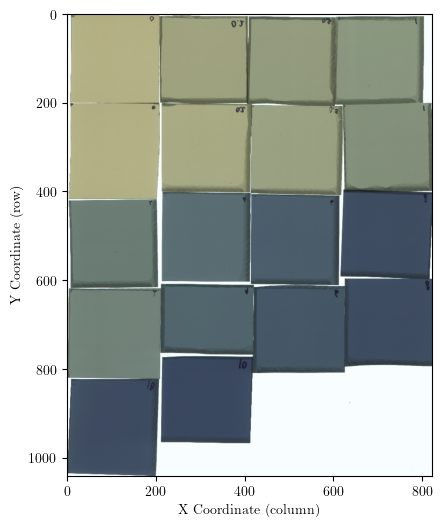

In [15]:
# ------------------------ EJEMPLO DE USO ------------------------

# 1) Especifica la ruta de tu imagen TIFF
ruta = os.path.join('media', 'Dosis0a10.tif')

# Leer la imagen TIFF
imagen = read_image(ruta)

# 2) Muestra la imagen original para determinar dónde quieres recortar.
_ = show_image(imagen)
#print(imagen.shape)

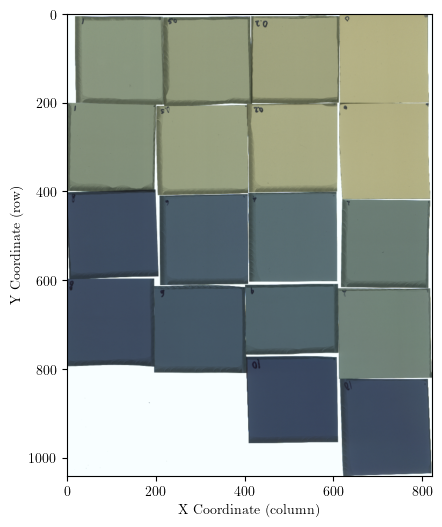

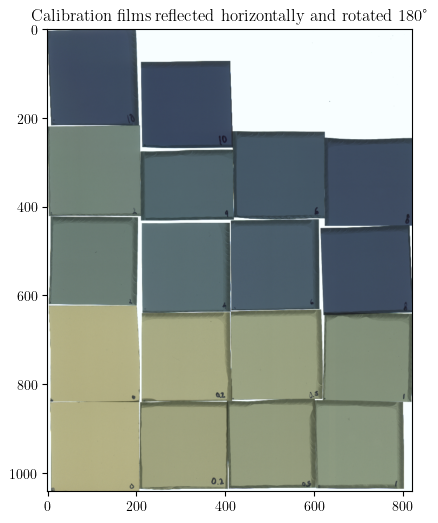

In [16]:
imagen_reflejada = reflect_image(imagen, mode='horizontal')
show_image(imagen_reflejada)

imagen_girada = rotate_image(imagen_reflejada, times=2, direction='clockwise')
_ = show_image(imagen_girada, title='Calibration films reflected horizontally and rotated 180°', show_labels=False)

In [17]:
# Diccionario con las coordenadas de las ROIs cuadradas
rois = {
    '0 Gy': (),
    '0.2 Gy': (),
    '0.5 Gy': (),
    '1 Gy': (),
    '2 Gy': (),
    '4 Gy': (),
    '6 Gy': (),
    '8 Gy': (),
    '10 Gy': (),
}

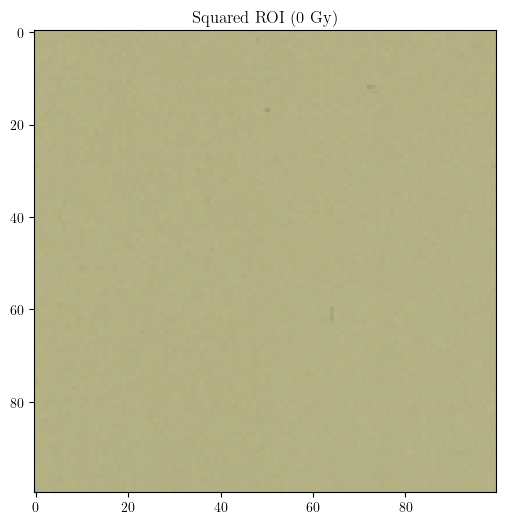

In [18]:
# Ahora, usando la imagen mostrada, elige manualmente:
#  - La esquina superior izquierda (x, y) donde comenzar el recorte
#  - El lado del cuadrado que desees

# 3) Define las coordenadas de la ROI (recuerda: x es columna, y es fila)
x_inicial = 50   # Ejemplo
y_inicial = 50  # Ejemplo
lado_roi  = 100  # ROI cuadrada de 200x200

# 4) Recorta la ROI
roi_cuadrada = crop_square_roi(imagen, x_inicial, y_inicial, lado_roi)

# 5) Muestra la ROI recortada

_ = show_image(roi_cuadrada, title="Squared ROI (0 Gy)", show_labels=False, show_axis=False)


## Continuación

In [19]:
orden_dosis = [0]*2 + [2]*2 + [0.2]*2 + [4]*2 + [0.5]*2 + [6]*2 + [1]*2 + [8]*2 + [10]*2
print(orden_dosis)

[0, 0, 2, 2, 0.2, 0.2, 4, 4, 0.5, 0.5, 6, 6, 1, 1, 8, 8, 10, 10]


# Modulo FilmCalibration

In [20]:
from multichannel_calibration.calibration import FilmCalibration

Bits per channel: 16


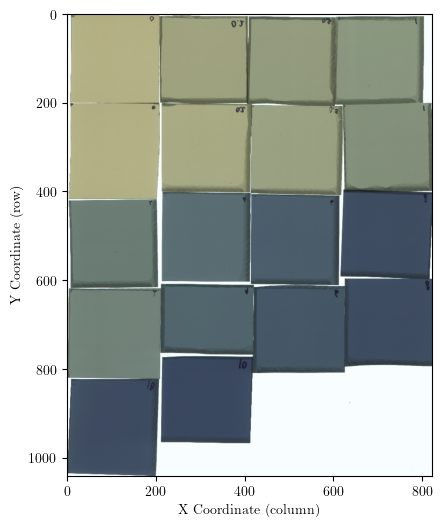

In [21]:
ruta = os.path.join('.','media', 'Dosis0a10.tif')
imagen_groundtruth = read_image(ruta)
show_image(imagen_groundtruth)

calibracion = FilmCalibration(imagen_groundtruth, fitting_function_name='polynomial')

In [22]:
print(calibracion)

FilmCalibration(NumDoses=0, NumROIs=0, Type=single-channel)


In [23]:
def obtener_rois(show=False):
    
    lado_roi = 100    
    index = 0

    for i in range(0+50,800,200):
        for j in range(0+50,800,200):
            print(i,j)

            dosis = orden_dosis[index]
            print(dosis)
            #coordenadas_rois[dosis] = (i,j)

            calibracion.add_roi(dosis, x=i, y=j, size=lado_roi)

            roi_cuadrada = crop_square_roi(imagen, i, j, lado_roi)
            
            #show_image(roi_cuadrada, title="ROI Cuadrada", show_axis=False)

            index += 1	

    x_inicial = 50   # Ejemplo
    y_inicial = 850  # Ejemplo
    lado_roi  = 100  # ROI cuadrada de 200x200

    # 4) Recorta la ROI
    roi_cuadrada = crop_square_roi(imagen, x_inicial, y_inicial, lado_roi)

    #show_image(roi_cuadrada, title="ROI Cuadrada", show_axis=False)

    calibracion.add_roi(10, x=x_inicial, y=y_inicial, size=lado_roi)

    ###################################

    x_inicial = 250   # Ejemplo
    y_inicial = 800  # Ejemplo
    lado_roi  = 100  # ROI cuadrada de 200x200

    # 4) Recorta la ROI
    roi_cuadrada = crop_square_roi(imagen, x_inicial, y_inicial, lado_roi)

    #show_image(roi_cuadrada, title="ROI Cuadrada", show_axis=False)

    calibracion.add_roi(10, x=x_inicial, y=y_inicial, size=lado_roi)

In [24]:
obtener_rois()

50 50
0
50 250
0
50 450
2
50 650
2
250 50
0.2
250 250
0.2
250 450
4
250 650
4
450 50
0.5
450 250
0.5
450 450
6
450 650
6
650 50
1
650 250
1
650 450
8
650 650
8


In [25]:
calibracion.get_rois_by_dose()

Dosis: 0 Gy
ROIs: [(50, 50, 100), (50, 250, 100)] 

Dosis: 2 Gy
ROIs: [(50, 450, 100), (50, 650, 100)] 

Dosis: 0.2 Gy
ROIs: [(250, 50, 100), (250, 250, 100)] 

Dosis: 4 Gy
ROIs: [(250, 450, 100), (250, 650, 100)] 

Dosis: 0.5 Gy
ROIs: [(450, 50, 100), (450, 250, 100)] 

Dosis: 6 Gy
ROIs: [(450, 450, 100), (450, 650, 100)] 

Dosis: 1 Gy
ROIs: [(650, 50, 100), (650, 250, 100)] 

Dosis: 8 Gy
ROIs: [(650, 450, 100), (650, 650, 100)] 

Dosis: 10 Gy
ROIs: [(50, 850, 100), (250, 800, 100)] 



In [26]:
calibracion.calibrate()

c:\Users\eduar\OneDrive - Universidad de los Andes\2025-10\Tesis Física\FilmQADose rama alternativa\FilmQADose\app\multichannel_calibration\functions.py:57: RuntimeWarning: divide by zero encountered in power
  return a * x + b * (x ** n)
c:\Users\eduar\OneDrive - Universidad de los Andes\2025-10\Tesis Física\FilmQADose rama alternativa\FilmQADose\app\multichannel_calibration\functions.py:60: RuntimeWarning: divide by zero encountered in power
  return a + b * n * (x)**(n - 1)


[array([ 8.07106019, 98.66201454,  3.86617642]),
 array([11.29033674, 58.26141573,  2.51114706]),
 array([ 22.71779409, 164.42754432,   1.67335721])]

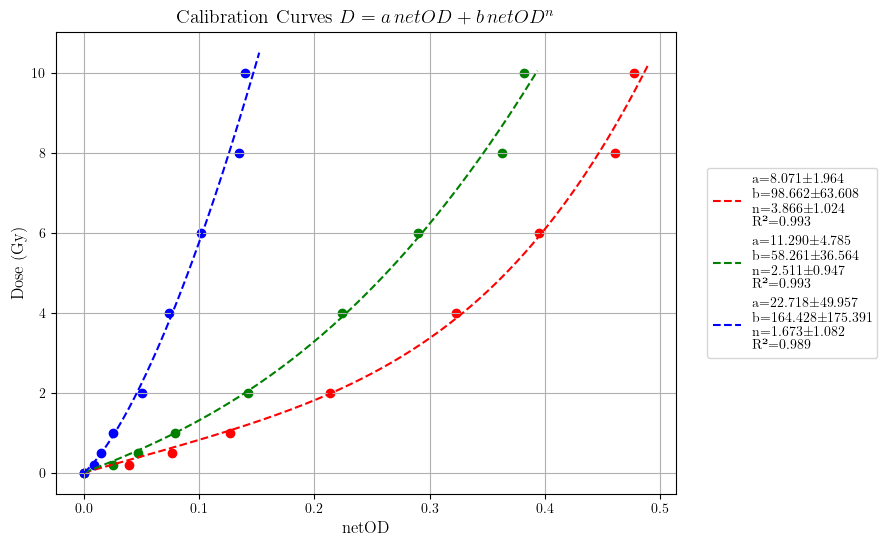

In [27]:
calibracion.graph_calibration_curve()

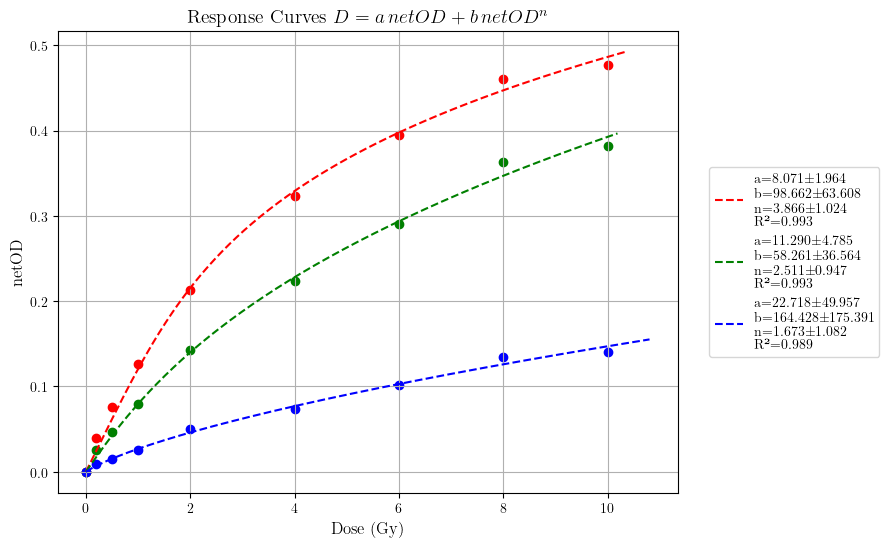

In [28]:
calibracion.graph_response_curve()

In [29]:
calibracion.to_json('calibracion_multi.json')

# PREDICCIÓN SINGLE CHANNEL

In [30]:
from multichannel_calibration.image_processing import filter_image

In [31]:
film_name = "mama100cropped"
#film_name = "B_marked_new"
#film_name = "mama100"
film_path = os.path.join("media", f"{film_name}.tif")


dose_maps = []
for channel in range(3):
    dose_map = calibracion.compute_dose_map(film_path, channel=channel)
    dose_maps.append(dose_map)

Bits per channel: 8
Bits per channel: 8
Bits per channel: 8


c:\Users\eduar\OneDrive - Universidad de los Andes\2025-10\Tesis Física\FilmQADose rama alternativa\FilmQADose\app\multichannel_calibration\functions.py:57: RuntimeWarning: invalid value encountered in power
  return a * x + b * (x ** n)


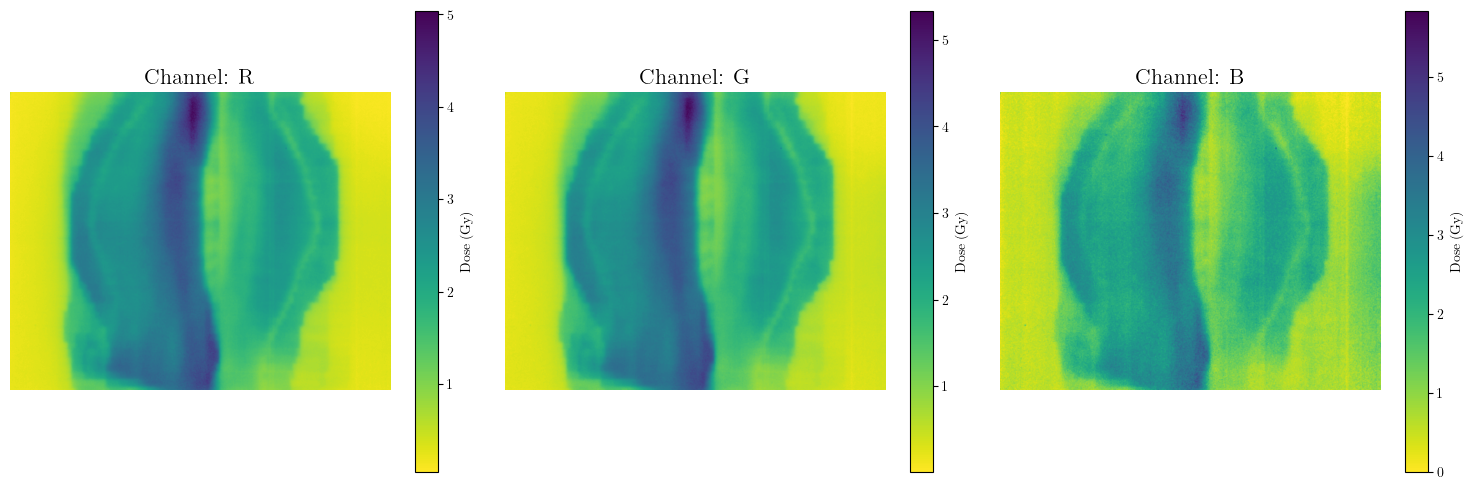

In [32]:
import matplotlib.pyplot as plt

canales = ['R', 'G', 'B']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    # Guardas el objeto de tipo AxesImage que retorna imshow
    im = axs[i].imshow(dose_maps[i], cmap='viridis_r')
    axs[i].set_title(f'Channel: {canales[i]}', fontsize=16)
    # Aquí creas la barra de color para 'im' asociándola al eje axs[i]
    fig.colorbar(im, ax=axs[i], label='Dose (Gy)')
    # O también podrías usar plt.colorbar(im, ax=axs[i], label='Dosis (Gy)')

    # Corrige la llamada a set_axis_off (que es un método y se ejecuta con paréntesis)
    axs[i].set_axis_off()

plt.tight_layout()
plt.show()


# PREDICCION MULTICANAL

In [33]:
#film_name = "mama100cropped"
film_name = "B_marked_new"
#film_name = "mama100"
film_path = os.path.join("media", f"{film_name}.tif")
read_image(film_path)

dose_map_multi = calibracion.compute_dose_map_multichannel(film_path)


Bits per channel: 16
Bits per channel: 16
Bits per channel: 16
Bits per channel: 16
Bits per channel: 16
Bits per channel: 16
Bits per channel: 16


c:\Users\eduar\OneDrive - Universidad de los Andes\2025-10\Tesis Física\FilmQADose rama alternativa\FilmQADose\app\multichannel_calibration\functions.py:60: RuntimeWarning: invalid value encountered in power
  return a + b * n * (x)**(n - 1)


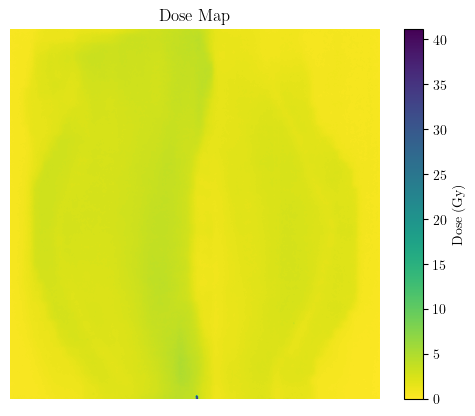

In [34]:
# graficar mapa
plt.imshow(dose_map_multi, cmap='viridis_r')
plt.colorbar(label='Dose (Gy)')
plt.title('Dose Map')
plt.axis('off')
plt.show()

In [35]:
dose_map_multi_copy = dose_map_multi.copy()
dose_map_multi_copy[dose_map_multi_copy >6] = 0

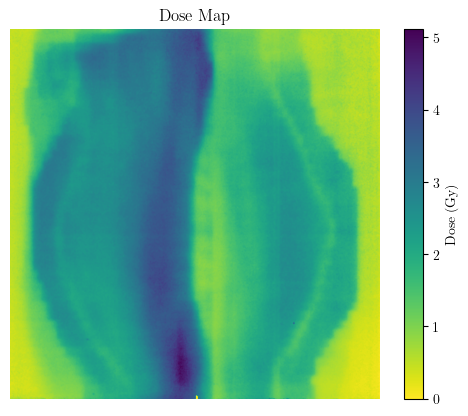

In [36]:
# graficar mapa
plt.imshow(dose_map_multi_copy, cmap='viridis_r')
plt.colorbar(label='Dose (Gy)')
plt.title('Dose Map')
plt.axis('off')
plt.show()

In [37]:
# resize dose map to 512x512
import cv2

dose_map_multi_copy = cv2.resize(dose_map_multi_copy, dsize=(512, 512), interpolation=cv2.INTER_LINEAR)

dose_map_multi_ori = cv2.resize(dose_map_multi, dsize=(512, 512), interpolation=cv2.INTER_LINEAR)


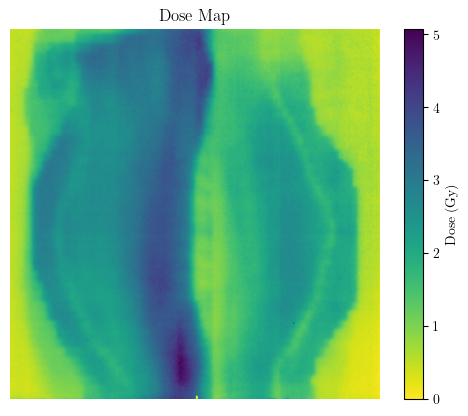

In [38]:
# graficar mapa
plt.imshow(dose_map_multi_copy, cmap='viridis_r')
plt.colorbar(label='Dose (Gy)')
plt.title('Dose Map')
plt.axis('off')
plt.show()

In [40]:
# guardar mapa con numpy
import numpy as np

#np.save('media/maps/dose_map_multi_oriii.npy', dose_map_multi_ori)
np.save('media/maps/dose_map_multi_copyyy.npy', dose_map_multi_ori)